Import Important Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn import svm

Understand the Dataset

In [2]:
data = pd.read_csv("heart1.csv")

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


Shape of dataset

In [4]:
data.shape

(1025, 14)

Summary of dataset

In [5]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


An overview of the dataset 

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


Understand features

In [7]:
dataset_features = [
    "age","1: male, 0: female","chest pain type, 1: typical angina, 2: \
    atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure",\
    " serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)",\
    " maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest",\
    "the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy",\
    "thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]

for i in range(len(dataset_features)):
    print(data.columns[i] +":\t\t"+dataset_features[i])

age:		age
sex:		1: male, 0: female
cp:		chest pain type, 1: typical angina, 2:     atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:		resting blood pressure
chol:		 serum cholestoral in mg/dl
fbs:		fasting blood sugar > 120 mg/dl
restecg:		resting electrocardiographic results (values 0,1,2)
thalach:		 maximum heart rate achieved
exang:		exercise induced angina
oldpeak:		oldpeak = ST depression induced by exercise relative to rest
slope:		the slope of the peak exercise ST segment
ca:		number of major vessels (0-3) colored by flourosopy
thal:		thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


Analyze target variable

In [8]:
data["target"].describe()

count    1025.000000
mean        0.513171
std         0.500070
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: target, dtype: float64

In [9]:
data["target"].unique()

array([0, 1])

The target variable having(1, 0) values, its a classification problem

Check corelation between features

In [10]:
check_cor = data.corr()["target"].abs().sort_values(ascending=False)

In [11]:
print(check_cor)

target      1.000000
oldpeak     0.438441
exang       0.438029
cp          0.434854
thalach     0.422895
ca          0.382085
slope       0.345512
thal        0.337838
sex         0.279501
age         0.229324
trestbps    0.138772
restecg     0.134468
chol        0.099966
fbs         0.041164
Name: target, dtype: float64


This shows that most features are relatively correlated with target, but 'fbs' is very weakly correlated.

Exploratory Data Analysis

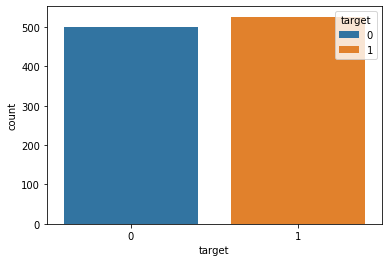

In [12]:
# Analyze target variable
sns.countplot(data["target"], hue=data["target"], dodge=False)

In [13]:
target_count = data.target.value_counts()
print(target_count)

1    526
0    499
Name: target, dtype: int64


From the total dataset of 303 patients, 165 (54.46%) have a heart disease (target=1) and 138 (45.54%) does not have heart disease(target=0)

In [14]:
# Analyze sex variable
data["sex"].unique()

array([1, 0])

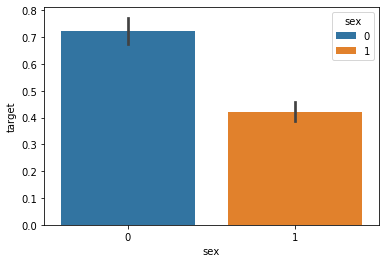

In [15]:
sns.barplot(data["sex"], data["target"], hue=data["sex"], dodge=False)

We notice, that females are more likely to have heart problems than males

In [16]:
# Analysing the 'Chest Pain Type' feature
data["cp"].unique()

array([0, 1, 2, 3])

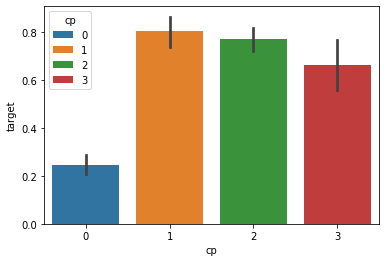

In [17]:
sns.barplot(data["cp"], data["target"], hue=data["cp"], dodge=False)

We notice, that chest pain of '0', i.e. the ones with typical angina are much less likely to have heart problems

In [18]:
# Analysing the FBS feature
data["fbs"].unique()

array([0, 1])

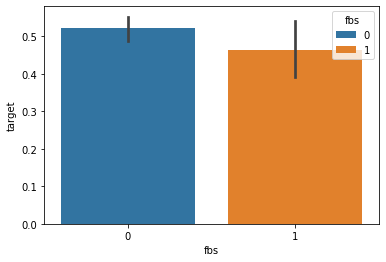

In [19]:
sns.barplot(data["fbs"], data["target"], hue=data["fbs"], dodge=False)

In [20]:
# Analysing the restecg feature
data["restecg"].unique()

array([1, 0, 2])

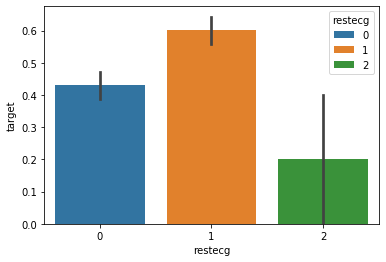

In [21]:
sns.barplot(data["restecg"], data["target"], hue=data["restecg"], dodge=False)

We notice that people with restecg '1' and '0' are much more likely to have a heart disease than with restecg '2'

In [22]:
# Analysing the 'exang' feature
data["exang"].unique()

array([0, 1])

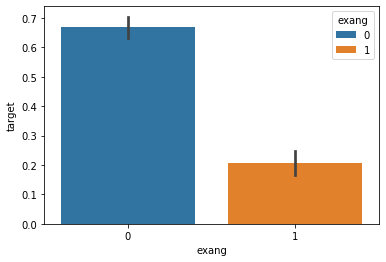

In [23]:
sns.barplot(data["exang"], data["target"], hue=data["exang"], dodge=False)

People with exang=1 i.e. Exercise induced angina are much less likely to have heart problems

In [24]:
# Analysing the Slope feature
data["slope"].unique()

array([2, 0, 1])

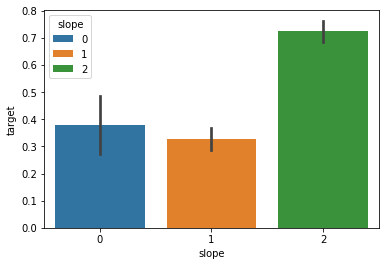

In [25]:
sns.barplot(data["slope"], data["target"], hue=data["slope"], dodge=False)

We observe, that Slope '2' causes heart pain much more than Slope '0' and '1'

In [26]:
# Analysing the 'ca' feature
data["ca"].unique()

array([2, 0, 1, 3, 4])

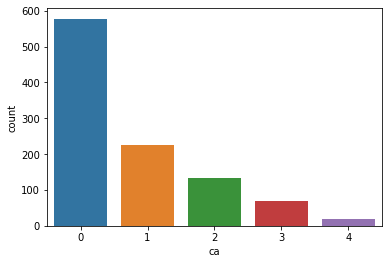

In [27]:
sns.countplot(data["ca"])

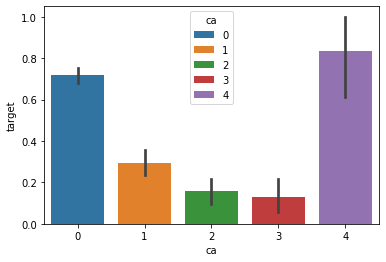

In [28]:
sns.barplot(data["ca"], data["target"], hue=data["ca"], dodge=False)

ca=4 has large number of heart patients

In [29]:
# Analysing the 'thal' feature
data["thal"].unique()

array([3, 2, 1, 0])

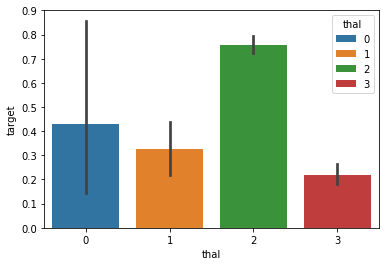

In [30]:
sns.barplot(data["thal"], data["target"], hue=data["thal"], dodge=False)

Split Data(Train and Test)

In [31]:
X = data.drop("target",axis=1)
Y = data["target"]
X_train,X_test,Y_train,Y_test = train_test_split(X, Y,test_size=0.20,random_state=0)

In [32]:
X_train.shape

(820, 13)

In [33]:
X_test.shape

(205, 13)

In [34]:
Y_train.shape

(820,)

In [35]:
Y_test.shape

(205,)

Logistic Regression

In [36]:
logistic_regression = LogisticRegression()

In [37]:
logistic_regression.fit(X_train,Y_train)

/home/zia/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
Y_pred_logistic_reg = logistic_regression.predict(X_test)

In [39]:
Y_pred_logistic_reg.shape

(205,)

In [40]:
logistic_reg_score = round(accuracy_score(Y_pred_logistic_reg,Y_test)*100, 2)
print("The accuracy score achieved using Logistic Regression is: "+str(logistic_reg_score)+"%")

The accuracy score achieved using Logistic Regression is: 86.34%


Support Vector Machine

In [41]:
svm_model = svm.SVC(kernel='linear')

In [42]:
svm_model.fit(X_train, Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [43]:
Y_pred_svm = svm_model.predict(X_test)

In [44]:
Y_pred_svm.shape

(205,)

In [45]:
svm_score = round(accuracy_score(Y_pred_svm,Y_test)*100, 2)
print("The accuracy score achieved using Linear SVM is: "+str(svm_score)+" %")

The accuracy score achieved using Linear SVM is: 83.9 %


Comparison between Logistic Regression and Support vector Machine

In [46]:
scores = [logistic_reg_score, svm_score]
models = ["Logistic Regression", "Support Vector Machine"]    

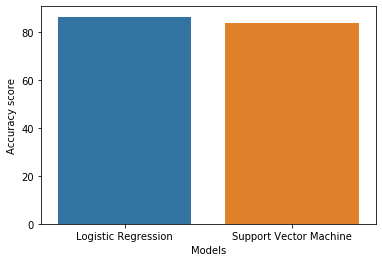

In [47]:
plt.xlabel("Models")
plt.ylabel("Accuracy score")
sns.barplot(models,scores)

Above barplot shows Logistic regression has better accuracy than Support vector machine